In [49]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Download the heart data csv file from **kaggle**

In [51]:
df=pd.read_csv('/content/drive/MyDrive/Copy of heart_disease_data.csv')  #Copy Paste the path of heart disease data CSV file from drive in file section of COLLAB
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


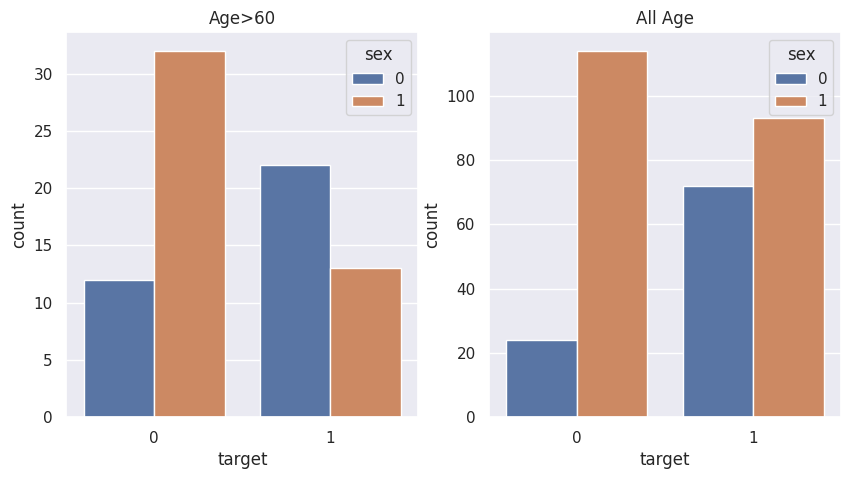

In [52]:
sns.set_theme()
fig,ax= plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='target',data=df[df['age']>60],hue='sex',ax=ax[0]).set_title('Age>60')
sns.countplot(x='target',data=df,hue='sex',ax=ax[1]).set_title('All Age')

plt.show()


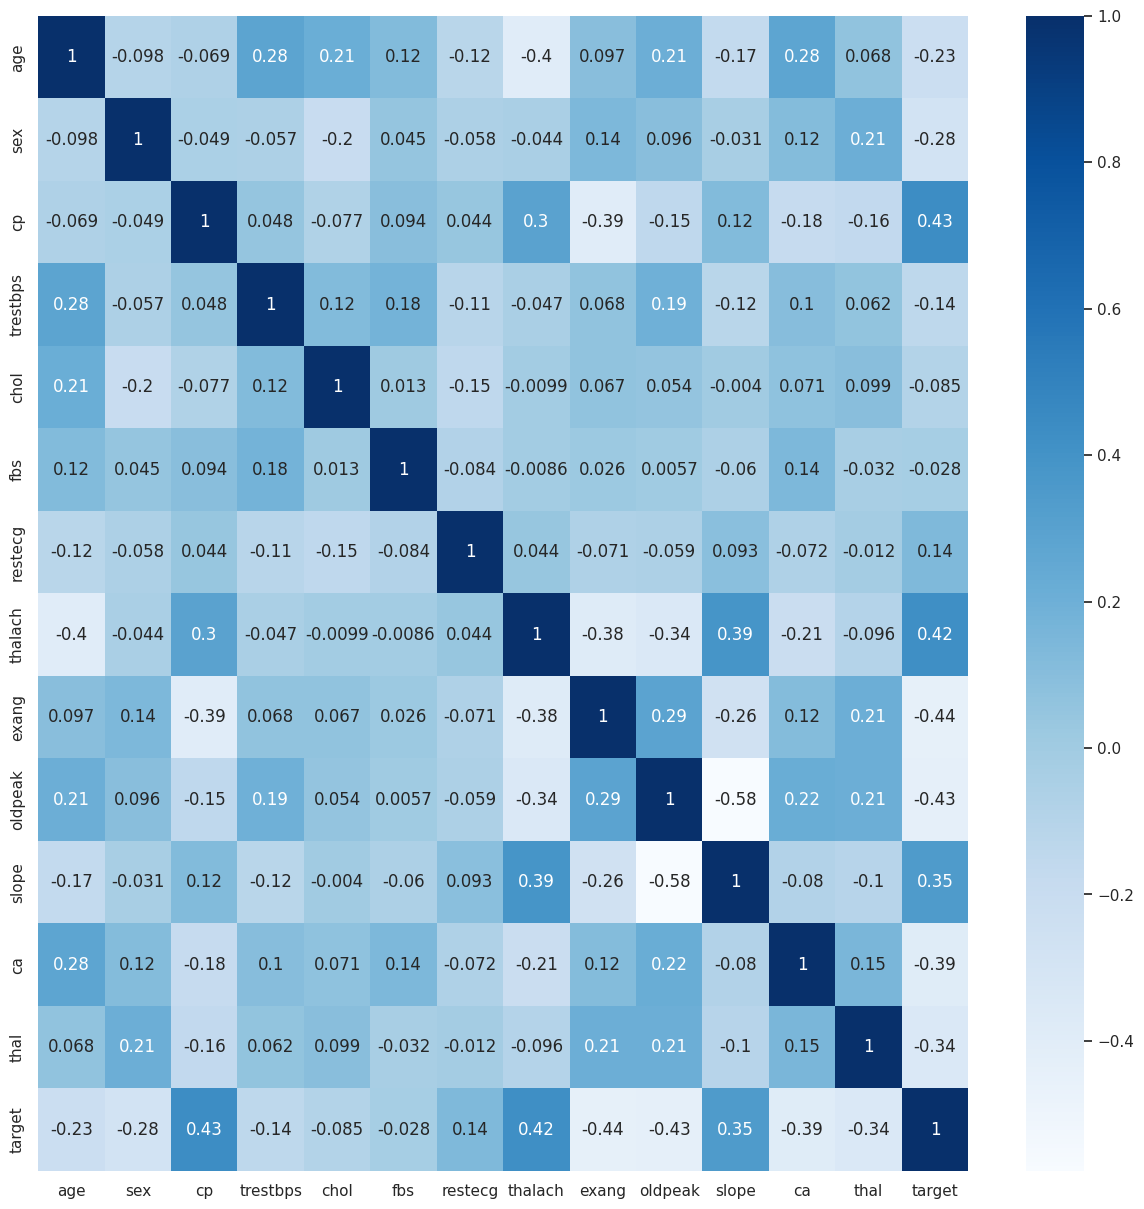

In [53]:
correlation=df.corr()
fig,ax=plt.subplots(1,1,figsize=(15,15))
sns.heatmap(correlation,annot=True,cmap='Blues',ax=ax)
plt.show()

In [54]:
df.describe()
# Needed standization

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [55]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [56]:
X=df.drop('target',axis=1)
y=df['target']

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


In [58]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [59]:
print(X.std())

age          9.082101
sex          0.466011
cp           1.032052
trestbps    17.538143
chol        51.830751
fbs          0.356198
restecg      0.525860
thalach     22.905161
exang        0.469794
oldpeak      1.161075
slope        0.616226
ca           1.022606
thal         0.612277
dtype: float64


In [60]:
# scaler=StandardScaler()
# scaler.fit(X_train)
# X_train=scaler.transform(X_train)
# X_test=scaler.transform(X_test)

In [61]:
print(X_train.std())

age          9.153317
sex          0.466736
cp           1.008656
trestbps    17.994486
chol        47.847387
fbs          0.348221
restecg      0.531185
thalach     21.977948
exang        0.474297
oldpeak      1.206258
slope        0.620125
ca           1.042889
thal         0.605010
dtype: float64


In [62]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [63]:
y_pred_model=model.predict(X_test)


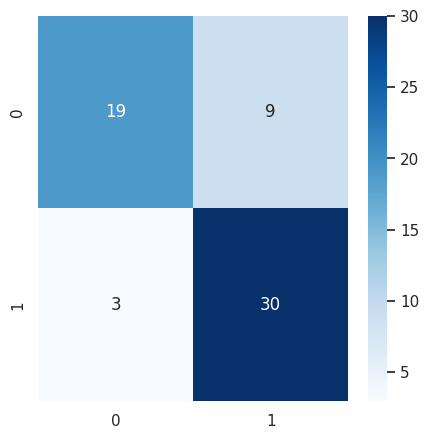

In [68]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_model), annot=True, fmt='d', ax=ax, cmap='Blues')
plt.show()

In [69]:
print("training data accuracy score:",accuracy_score(y_train,model.predict(X_train)))
print(classification_report(y_train,model.predict(X_train)))

training data accuracy score: 0.8388429752066116
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       110
           1       0.82      0.91      0.86       132

    accuracy                           0.84       242
   macro avg       0.85      0.83      0.83       242
weighted avg       0.84      0.84      0.84       242



In [67]:
print("testing data accuracy score:",accuracy_score(y_test,y_pred_model))
print(classification_report(y_test,y_pred_model))

testing data accuracy score: 0.8032786885245902
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



In [66]:
input=([63,1,3,145,233,1,0,150,0,2.3,0,0,1	])
y=model.predict([input])
if y==0:
  print("No Disease")
else:
  print("Disease")


Disease
